## Klassifikation

In diesem Beispiel versuchen wir ein tieferes Verständnis für Logistische Regression und Softmax Regression zu bekommen. Dazu plotten wir einige Entscheidungsgrenzen unserer Klassifikatoren.

Zuerst laden wir das Iris Datenset. Dieses Datenset beinhaltet 150 Beobachtungen von jeweils vier Attributen von Schwertlilien. Gemessen wurden dabei jeweils die Breite und die Länge des Kelchblatts (Sepalum) sowie des Kronblatts (Petalum) in Zentimeter. Des weiteren ist für jeden Datensatz die Art der Schwertlilie (Iris setosa, Iris virginica oder Iris versicolor) angegeben.

In [3]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
data.data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Binärer Klassifikator

Zu Visualisierungszwecken benutzen wir nur die Features Petal-Länge (Index 2) und Petal-Breite (Index 3). Weiters wollen wir zuerst einen Klassifikator trainieren, welcher Iris Virginica (Index 2) von den restlichen Iris Arten unterscheiden kann.

In [5]:
from sklearn.model_selection import train_test_split
X = data.data.iloc[:, 2:]  # wähle nur `petal length` und `petal width`
y = data.target == 2  # Binärer Vektor, 1: Iris Virginica, 0: nicht Iris Virginica
X.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

## 2a. Binäre Logistische Regression
- Trainiere eine binäre Logistische Regression (`sklearn.linear_model.LogisticRegression`) um Iris Virginica zu erkennen.
- Benutze eine l2 Regularisierung `penalty='l2'` und `GridSearchCV` für den Parameter `C`.
- Welchen Einfluss hat der Hyperparameter C?

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [8]:
help(LogisticRegression())

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [9]:
points = np.linspace(0.01,1,20)
binary_log = Pipeline([
    #("std_scaler", StandardScaler()),
    ("logistic_regression", LogisticRegression(C=0.21)),
    
])
grid_search = GridSearchCV(binary_log, {"logistic_regression__C": points,
                                         }, cv=3)
grid_search.fit(X_train,y_train
                )
binary_log.fit(X_train,y_train)

Pipeline(steps=[('logistic_regression', LogisticRegression(C=0.3))])

In [10]:
grid_search.best_params_

{'logistic_regression__C': 0.21842105263157896}

In [11]:
binary_log.steps[0][1].coef_

array([[1.75871785, 1.17934768]])

In [12]:
binary_log.steps[0][1].intercept_


array([-10.56511609])

In [13]:
def log_class(x):
    #print(x)
    sum0 = log_reg.intercept_[0]
    for k,z in enumerate(x):
        sum0 += log_reg.coef_[0][k]*z
    p =  1/(1 + np.exp(-sum0))
    if p>1/2:
        return 1
    else:
        return -1

Im nächsten Schritt wollen wir die Entscheidungsgrenze plotten. Forme dazu die Klassenzugehörigkeitswahrscheinlichkeit in Form der Sigmoid Funktion auf $x_2$ (Petal-Breite) um und setze $p=0.5$.
$$ p = \sigma(x) = {1 \over 1 + \exp(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}$$

- Schreibe eine Python Funktion (benutze die Parameter `intercept_` und `coef_`).
- Erstelle einen Plot mit dem Datensatz (nur Petal Länge und Petal Breite) und zeichne die Entscheidungsgrenze ein.


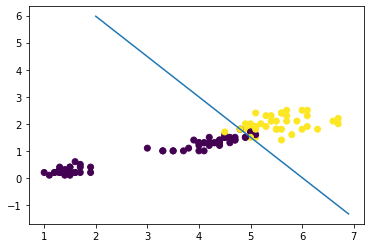

In [14]:
import numpy as np
import matplotlib.pyplot as plt
log_reg = binary_log.steps[0][1]
# model.fit(X_train, y_train)

def decision_boundary(x):
    #print(x)
    c1 = log_reg.intercept_[0]
    c2 = log_reg.coef_[0][0]
    c3 = log_reg.coef_[0][1]
    return -c2/c3*x - c1/c3

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
x = np.arange(2,7,0.1)
# x = X_train.iloc[:, :].values
y = decision_boundary(x)
plt.plot(x, y)

## 2b. Entscheidungsgrenze von Iris Versicolor
- Trainiere eine Logistische Regression für Iris Versicolor.
- Plotte wie im vorherigen Beispiel die Entscheidungsgrenze.

In [15]:
X = data.data.iloc[:, 2:]  # wähle nur `petal length` und `petal width`
y = data.target == 1  # Binärer Vektor 1: Iris Versicolor, 0: nicht Iris Versicolor
X_train, X_test, y_train, y_test = train_test_split(X, y == 1, test_size=0.2, random_state=42)

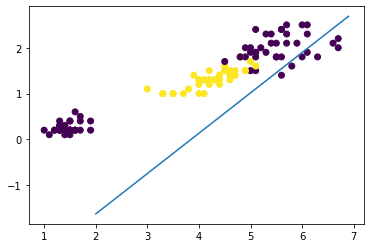

In [16]:

binary_log.fit(X_train,y_train)
log_reg = binary_log.steps[0][1]
# model.fit(X_train, y_train)

def decision_boundary(x):
    #print(x)
    c1 = log_reg.intercept_[0]
    c2 = log_reg.coef_[0][0]
    c3 = log_reg.coef_[0][1]
    return -c2/c3*x - c1/c3

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
x = np.arange(2,7,0.1)
# x = X_train.iloc[:, :].values
y = decision_boundary(x)
plt.plot(x, y)

## 2c. Softmax Regression
Um einen Multioutput Klassifikator zu trainieren, können wir einfach den ursprünglichen Targetvektor verwenden. `sklearn` trainiert dann eine Softmax Regression.


In [17]:
X = data.data.iloc[:, 2:]  # wähle nur `petal length` und `petal width`
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model = LogisticRegression(penalty='none', multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', penalty='none')

Um die Entscheidungsgrenzen zu plotten verwenden wir einen Konturplot.

c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

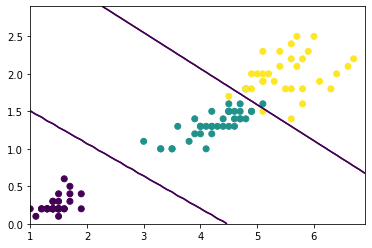

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    plt.figure()
    petal_length = np.arange(1, 7, 0.1)
    petal_width = np.arange(0, 3, 0.1)

    X_grid, Y_grid = np.meshgrid(petal_length, petal_width)

    def pred(x, y, label):
        return model.predict_proba(np.c_[x, y])[0, label]

    pred = np.frompyfunc(pred, 3, 1, )

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)

    Z = pred(X_grid, Y_grid, 0)
    plt.contour(X_grid, Y_grid, Z, [0.5])
    Z = pred(X_grid, Y_grid, 1)
    plt.contour(X_grid, Y_grid, Z, [0.5])
    Z = pred(X_grid, Y_grid, 2)
    plt.contour(X_grid, Y_grid, Z, [0.5])
    
plot_decision_boundary(model, X_train, y_train)

- Plotte die Entscheidungsgrenzen für verschiedene Werte des Hyperparameters `C`. Verwende dazu `penalty='l2'`.
- Berechne die Wahrheitsmatrix (Confusion Matrix)
- Berechne folgenden Werte: `accuracy_score, precision_score, recall_score, f1_score`

c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\natsc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

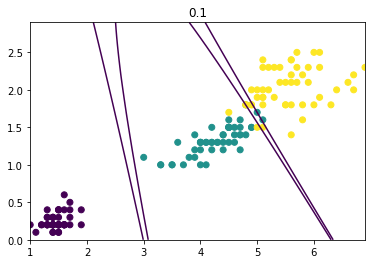

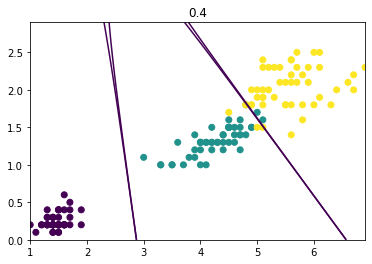

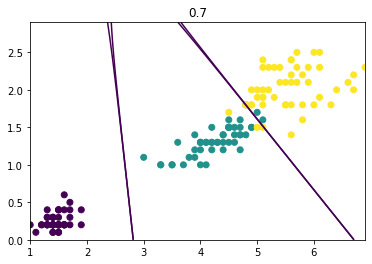

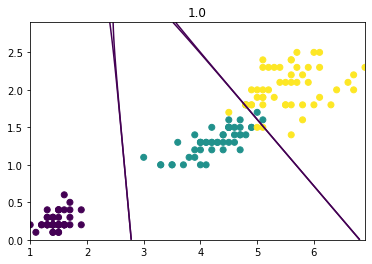

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
X = data.data.iloc[:, 2:]  # wähle nur `petal length` und `petal width`
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

for c in np.linspace(0.1,1,4):
    model = LogisticRegression(penalty='l2', multi_class='multinomial',C=c)
    model.fit(X_train, y_train)
    
    plot_decision_boundary(model,X,y)
    plt.title(c)

In [20]:
y_pred = model.predict(X_train)


In [21]:
for f in [ confusion_matrix,accuracy_score]:
    print(f,"\n",f(y_train,y_pred))
for f in [ precision_score, recall_score, f1_score,]:
    print(f,"\n ",f(y_train,y_pred,average="micro"))


<function confusion_matrix at 0x000001FDEAFB60D0> 
 [[34  0  0]
 [ 0 37  2]
 [ 0  2 30]]
<function accuracy_score at 0x000001FDEAFB6040> 
 0.9619047619047619
<function precision_score at 0x000001FDEAFB6790> 
  0.9619047619047619
<function recall_score at 0x000001FDEAFB6820> 
  0.9619047619047619
<function f1_score at 0x000001FDEAFB6430> 
  0.9619047619047619


In [22]:
# from sklearn.model_selection import cross_val_predict
# y_train_pred = cross_val_predict(model, X, y, cv=3)

In [23]:
#  precision_score(y_train,y_pred)
accuracy_score()

TypeError: accuracy_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [ ]:
y_train_pred.__len__()

150